In [5]:
import pandas as pd
from utils import eval_model
results = list()
clip = -1
for split in "dev test".split():
    config = {
        "output_column": "Party_status",
        "model_name_or_path": "models/facebook_wav2vec2-large-slavic-voxpopuli-v2_PARTY_STATUS_/checkpoint-624",
        "eval_file": f"012_{split}.csv",
        "clip_seconds": clip,
    }
    y_true, y_pred = eval_model(config)

    results.append({**config, "y_true": y_true, "y_pred": y_pred})

Using custom data configuration default-5d8e22d452fd7b02


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/peterr/.cache/huggingface/datasets/csv/default-5d8e22d452fd7b02/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

/home/peterr/anaconda3/lib/python3.8/site-packages/transformers/models/wav2vec2/processing_wav2vec2.py:52: FutureWarning: Loading a tokenizer inside Wav2Vec2Processor from a config that does not include a `tokenizer_class` attribute is deprecated and will be removed in v5. Please add `'tokenizer_class': 'Wav2Vec2CTCTokenizer'` attribute to either your `config.json` or `tokenizer_config.json` file to suppress this warning: 
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/900 [00:00<?, ?ex/s]

Parameter 'function'=<function eval_model.<locals>.predict at 0x7f23d8508550> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/113 [00:00<?, ?ba/s]

Using custom data configuration default-851b912a62e0bb34


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/peterr/.cache/huggingface/datasets/csv/default-851b912a62e0bb34/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/900 [00:00<?, ?ex/s]

  0%|          | 0/113 [00:00<?, ?ba/s]

In [7]:
import pandas as pd
df = pd.DataFrame(data=results)
df.to_json("012_results.jsonl", orient="records", lines=True)

In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_json("012_results.jsonl", orient="records", lines=True).drop_duplicates(subset=["eval_file", "clip_seconds"])
df["accuracy"] = df.apply(lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1)
df["macroF1"] = df.apply(lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1)
df.tail()

,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,accuracy,macroF1
0,Party_status,models/facebook_wav2vec2-large-slavic-voxpopul...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",0.624444,0.594121
1,Party_status,models/facebook_wav2vec2-large-slavic-voxpopul...,012_test.csv,-1,"[Coalition, Coalition, Coalition, Coalition, O...","[Opposition, Coalition, Opposition, Coalition,...",0.614444,0.595453


In [9]:
subset = df.loc[df.output_column=="Party_status", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                      |   accuracy |   macroF1 |
|:---------------------|-----------:|----------:|
| ('012_dev.csv', -1)  |   0.624444 |  0.594121 |
| ('012_test.csv', -1) |   0.614444 |  0.595453 |


,,accuracy,macroF1
eval_file,clip_seconds,,
012_dev.csv,-1,0.624444,0.594121
012_test.csv,-1,0.614444,0.595453


In [27]:
subset = df.loc[df.output_column=="Speaker_name", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()

#print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                                              |   accuracy |   macroF1 |
|:---------------------------------------------|-----------:|----------:|
| ('003_speaker_id_dev_for_datasets.csv', -1)  |      0.316 | 0.255417  |
| ('003_speaker_id_dev_for_datasets.csv', 2)   |      0.14  | 0.0799439 |
| ('003_speaker_id_test_for_datasets.csv', -1) |      0.334 | 0.274969  |
| ('003_speaker_id_test_for_datasets.csv', 2)  |      0.106 | 0.0479471 |


accuracy   macroF1
eval_file                            clip_seconds                    
003_speaker_id_dev_for_datasets.csv  -1               0.316  0.255417
                                      2               0.140  0.079944
003_speaker_id_test_for_datasets.csv -1               0.334  0.274969
                                      2               0.106  0.047947

In [11]:
y_true, y_pred = df.loc[1, ["y_true", "y_pred"]]


In [12]:
df.loc[1, :]

output_column                                              Party_status
model_name_or_path    models/facebook_wav2vec2-large-slavic-voxpopul...
eval_file                                                  012_test.csv
clip_seconds                                                         -1
y_true                [Coalition, Coalition, Coalition, Coalition, O...
y_pred                [Opposition, Coalition, Opposition, Coalition,...
accuracy                                                       0.614444
macroF1                                                        0.595453
Name: 1, dtype: object

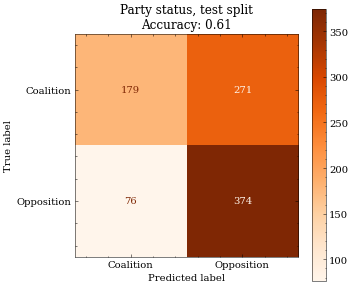

In [13]:
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Party status, test split\nAccuracy: 0.61")
plt.savefig("images/012_cm_party_status_test.png")
plt.savefig("images/012_cm_party_status_test.pdf")
plt.show()

In [30]:
subset = df.loc[df.output_column=="Speaker_age_group", ["eval_file", "clip_seconds", "accuracy", "macroF1"]].groupby(["eval_file", "clip_seconds"]).mean()
# print(subset.to_latex())
# print("\n\n\n")
print(subset.to_markdown())
subset

|                          |   accuracy |   macroF1 |
|:-------------------------|-----------:|----------:|
| ('006_age_dev.csv', -1)  |      0.716 |  0.708729 |
| ('006_age_test.csv', -1) |      0.678 |  0.672112 |


,,accuracy,macroF1
eval_file,clip_seconds,,
006_age_dev.csv,-1,0.716,0.708729
006_age_test.csv,-1,0.678,0.672112


In [14]:
df.loc[3, :]

output_column                                            Speaker_gender
model_name_or_path    models/facebook_wav2vec2-large-960h-lv60-self_...
eval_file                                           001_gender_test.csv
clip_seconds                                                          2
y_true                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
y_pred                [F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...
train_config                                                       None
accuracy                                                         0.9935
macroF1                                                          0.9935
Name: 3, dtype: object

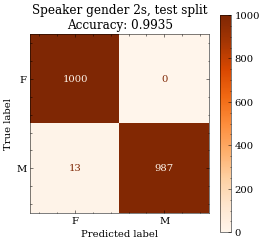

In [32]:
y_true, y_pred = df.loc[3, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker gender 2s, test split\nAccuracy: 0.9935")
plt.savefig("images/011_cm_speaker_gender_test.png")
plt.savefig("images/011_cm_speaker_gender_test.pdf")
plt.show()

In [16]:
df.loc[9, :]

output_column                                         Speaker_age_group
model_name_or_path    models/facebook_wav2vec2-large-960h-lv60-self_...
eval_file                                              006_age_test.csv
clip_seconds                                                         -1
y_true                [old, old, old, old, old, old, old, old, old, ...
y_pred                [old, young, young, old, old, young, young, yo...
train_config          {'model_name_or_path': 'facebook/wav2vec2-larg...
accuracy                                                          0.678
macroF1                                                        0.672112
Name: 9, dtype: object

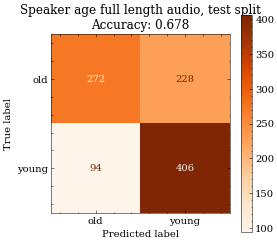

In [33]:
y_true, y_pred = df.loc[9, ["y_true", "y_pred"]]
import matplotlib.pyplot as plt
plt.style.use("science no-latex".split())
from sklearn.metrics import ConfusionMatrixDisplay
fi, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay.from_predictions(
   y_true, y_pred, cmap="Oranges", ax=ax, xticks_rotation=0)
plt.title("Speaker age full length audio, test split\nAccuracy: 0.678")
plt.savefig("images/011_cm_speaker_age_test.png")
plt.savefig("images/011_cm_speaker_age_test.pdf")
plt.show()

In [18]:
test = pd.read_csv(df.loc[9, "eval_file"])

test["y_pred"] = df.loc[9, "y_pred"]
test["y_true"] = df.loc[9, "y_true"]
test["missclassified"] = test.y_pred != test.y_true

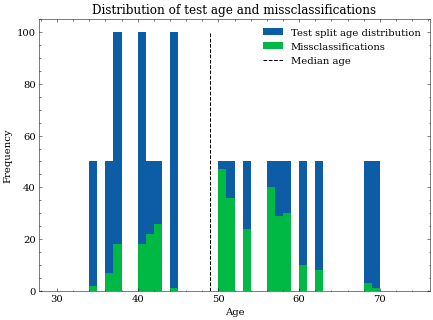

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.hist(bins=r, ax=ax, label="Test split age distribution")
test.Speaker_age_at_recording[test.missclassified].plot.hist(bins=r, ax=ax, label="Missclassifications")
ax.vlines(49, 0, 100, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.title("Distribution of test age and missclassifications")

fname = "images/011_age_missclassifications_histogram"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


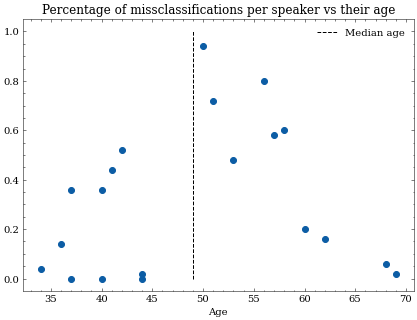

In [20]:
gb = test.groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    })

x = gb.Speaker_age_at_recording
y = gb.missclassified


fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x,y)
ax.vlines(49, 0, 1, linestyles="dashed", label="Median age")
ax.set_xlabel("Age")
plt.legend()
ax.set_title("Percentage of missclassifications per speaker vs their age")

fname = "images/011_age_missclassifications_percentages_scatter"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()


In [34]:
test.columns

Index(['Speaker_name', 'Count', 'Speaker_age_at_recording', 'Speaker_gender',
       'Speaker_age_group', 'path', 'y_pred', 'y_true', 'missclassified'],
      dtype='object')

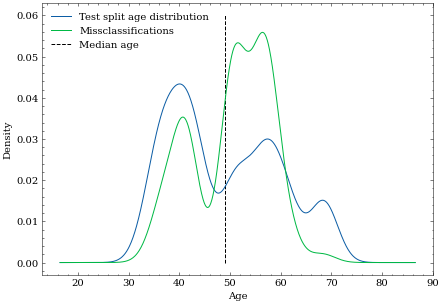

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
r = range(30, 75, 1)

test.Speaker_age_at_recording.plot.kde(
    # bins=r, 
    ax=ax, 
    label="Test split age distribution"
    )
test.Speaker_age_at_recording[test.missclassified].plot.kde(
    # bins=r, 
    ax=ax, 
    label="Missclassifications"
    )
ax.vlines(49, 0, 0.06, linestyles="dashed", label="Median age")
plt.legend()
plt.xlabel("Age")
plt.show()


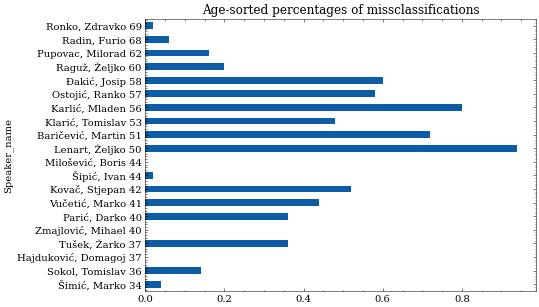

In [23]:
new_names = test.Speaker_name+" "+ test.Speaker_age_at_recording.astype(int).astype(str)
gb = test.assign(Speaker_name=new_names).groupby("Speaker_name").agg({
    "missclassified": lambda i: sum(i) / len(i),
    "Speaker_age_at_recording": "median"
    }).sort_values("Speaker_age_at_recording", ascending=True)
gb

x = gb.missclassified
y = gb.index


fig, ax = plt.subplots(figsize=(7, 5))

gb.missclassified.plot.barh(ax=ax)

plt.title("Age-sorted percentages of missclassifications")

fname = "images/011_age_missclassifications_percentages_by_speaker_barh"

plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()